# 0. Import Library

In [1]:
import tensorflow as tf
import os, glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from plot_results import *
from build_models import *

# 1. Data

## 1-1 Load data that already splited and preprocessed

In [102]:
#x_data = np.load('data/celeba_split/celeba_140000.npy')
x_data = np.load('data/x_30000.npy')
y_data = np.load('data/y_30000.npy', allow_pickle=True)
x_data = x_data/255
print('* data shape: ', x_data.shape, y_data.shape)

* data shape:  (30000, 64, 64, 3) (30000,)


In [103]:
y_data

array(['000001.jpg', '000002.jpg', '000003.jpg', ..., '029998.jpg',
       '029999.jpg', '030000.jpg'], dtype='<U10')

# 2. Load Model 

## 2-1. Get VAE model structure from build_vae.py

In [3]:
encoder, decoder, vae = build_vae(x_data, 100)
#encoder.summary()
#decoder.summary()
vae.summary()

Model: "vae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
encoder (Model)              [(None, 100), (None, 100) 277160    
_________________________________________________________________
decoder (Model)              (None, 64, 64, 3)         251843    
Total params: 529,003
Trainable params: 529,003
Non-trainable params: 0
_________________________________________________________________


## 2-2. Get Weight from training result's Checkpoint

In [4]:
save_dir = 'results_VAE/train_10'
checkpoint = tf.train.Checkpoint(step=tf.Variable(1), encoder=encoder, decoder=decoder, vae=vae)
checkpoint.restore(tf.train.latest_checkpoint(save_dir))

# 3. Plot Resulsts

## 3-1. Plot VAE reconstruct Images

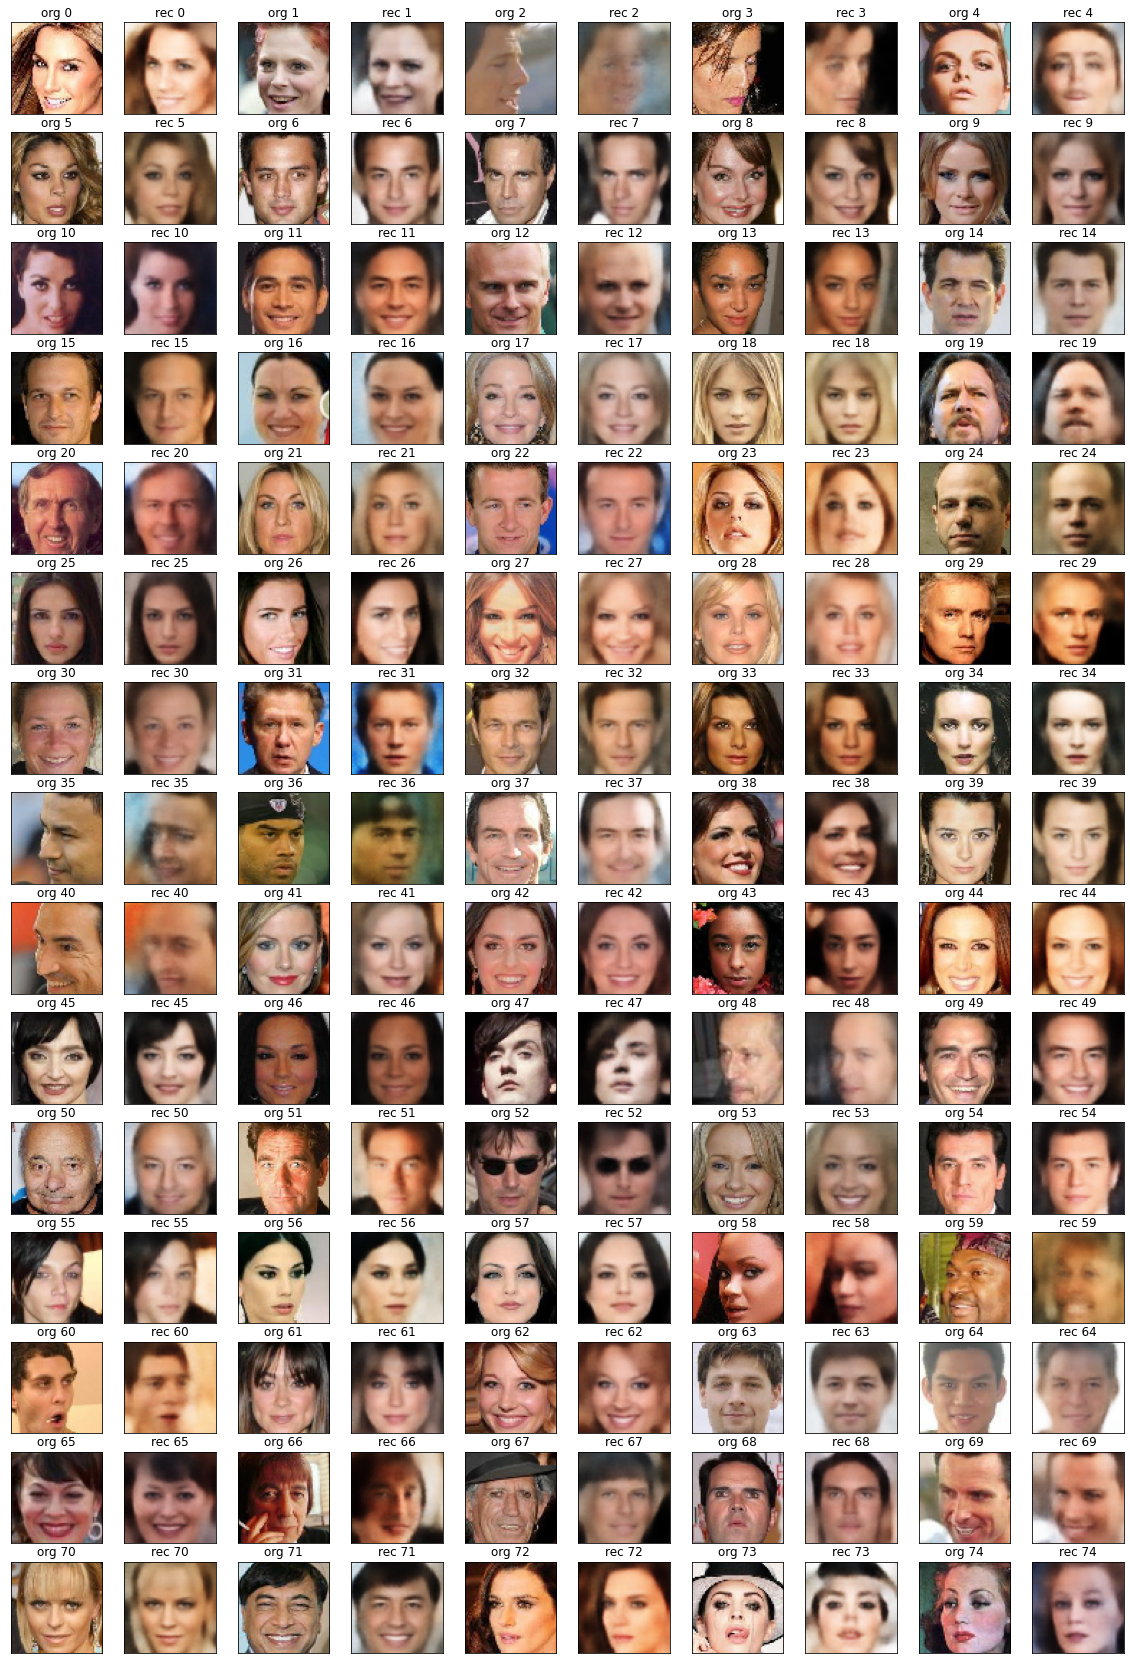

In [149]:
plot_recimg(vae, x_data, 15)

* original z space:  -10.5885935


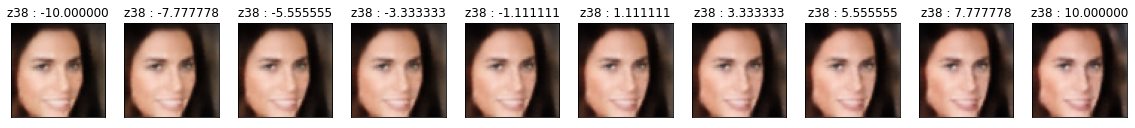

In [148]:
plot_gridimg(encoder, decoder, x_data, 26, 38, -10, 10)

In [104]:
z_pred = encoder.predict(x_data)[2]
y_pred = vae.predict(x_data)
z_pred.shape, y_pred.shape

((30000, 100), (30000, 64, 64, 3))

In [28]:
fId = sorted(np.load('./data/fmri_img/fId.npy'))
mId = sorted(np.load('./data/fmri_img/mId.npy'))

In [101]:
len(fId), len(mId)

(769, 707)

In [109]:
f_latent, m_latent=[],[]
for Id in fId[1:]:
    #fig=plt.figure()
    orgImg=x_data[y_data==Id]
    recImg=y_pred[y_data==Id]
    latent=z_pred[y_data==Id]
    print(Id, latent.shape)
    
    f_latent.append([Id, latent])
    
    #orgImg.reshape(orgImg.shape[1:])
    #recImg.reshape(recImg.shape[1:])
    #plt.subplot(1,2,1)
    #plt.title(Id)
    #plt.imshow(orgImg.reshape(orgImg.shape[1:]))
    #plt.subplot(1,2,2)
    #plt.imshow(recImg.reshape(recImg.shape[1:]))
    #plt.title(latant.shape)
print('M----')
for Id in mId[1:]:
    #fig=plt.figure()
    orgImg=x_data[y_data==Id]
    recImg=y_pred[y_data==Id]
    latent=z_pred[y_data==Id]
    print(Id, latent.shape)
    
    m_latent.append([Id, latent])


000006.jpg (1, 100)
000009.jpg (1, 100)
000010.jpg (1, 100)
000011.jpg (1, 100)
000019.jpg (1, 100)
000024.jpg (1, 100)
000026.jpg (1, 100)
000028.jpg (1, 100)
000029.jpg (1, 100)
000034.jpg (1, 100)
000035.jpg (1, 100)
000042.jpg (1, 100)
000043.jpg (1, 100)
000062.jpg (1, 100)
000066.jpg (1, 100)
000071.jpg (1, 100)
000085.jpg (1, 100)
000087.jpg (1, 100)
000099.jpg (1, 100)
000101.jpg (1, 100)
000106.jpg (1, 100)
000108.jpg (1, 100)
000111.jpg (1, 100)
000112.jpg (1, 100)
000132.jpg (1, 100)
000141.jpg (1, 100)
000151.jpg (1, 100)
000155.jpg (1, 100)
000157.jpg (1, 100)
000161.jpg (1, 100)
000176.jpg (1, 100)
000179.jpg (1, 100)
000180.jpg (1, 100)
000198.jpg (1, 100)
000204.jpg (1, 100)
000211.jpg (1, 100)
000217.jpg (1, 100)
000239.jpg (1, 100)
000249.jpg (1, 100)
000254.jpg (1, 100)
000258.jpg (1, 100)
000262.jpg (1, 100)
000263.jpg (1, 100)
000269.jpg (1, 100)
000280.jpg (1, 100)
000285.jpg (1, 100)
000287.jpg (1, 100)
000289.jpg (1, 100)
000296.jpg (1, 100)
000301.jpg (1, 100)


003201.jpg (1, 100)
003218.jpg (1, 100)
003222.jpg (1, 100)
003223.jpg (1, 100)
003224.jpg (1, 100)
003240.jpg (1, 100)
003263.jpg (1, 100)
003273.jpg (1, 100)
003275.jpg (1, 100)
003298.jpg (1, 100)
003336.jpg (1, 100)
003343.jpg (1, 100)
003344.jpg (1, 100)
003362.jpg (1, 100)
003397.jpg (1, 100)
003405.jpg (1, 100)
003409.jpg (1, 100)
003415.jpg (1, 100)
003421.jpg (1, 100)
003445.jpg (1, 100)
003453.jpg (1, 100)
003469.jpg (1, 100)
003473.jpg (1, 100)
003474.jpg (1, 100)
003537.jpg (1, 100)
003553.jpg (1, 100)
003561.jpg (1, 100)
003589.jpg (1, 100)
003590.jpg (1, 100)
003591.jpg (1, 100)
003596.jpg (1, 100)
003610.jpg (1, 100)
003637.jpg (1, 100)
003653.jpg (1, 100)
003674.jpg (1, 100)
003681.jpg (1, 100)
003759.jpg (1, 100)
003855.jpg (1, 100)
003882.jpg (1, 100)
003888.jpg (1, 100)
003910.jpg (1, 100)
003918.jpg (1, 100)
003950.jpg (1, 100)
003960.jpg (1, 100)
003962.jpg (1, 100)
003963.jpg (1, 100)
003964.jpg (1, 100)
003984.jpg (1, 100)
003989.jpg (1, 100)
004012.jpg (1, 100)


004614.jpg (1, 100)
004642.jpg (1, 100)
004656.jpg (1, 100)
004676.jpg (1, 100)
004677.jpg (1, 100)
004679.jpg (1, 100)
004711.jpg (1, 100)
004729.jpg (1, 100)
004750.jpg (1, 100)
004753.jpg (1, 100)
004760.jpg (1, 100)
004842.jpg (1, 100)
004941.jpg (1, 100)
004994.jpg (1, 100)
005006.jpg (1, 100)
005017.jpg (1, 100)
005039.jpg (1, 100)
005074.jpg (1, 100)
005118.jpg (1, 100)
005136.jpg (1, 100)
005141.jpg (1, 100)
005152.jpg (1, 100)
005208.jpg (1, 100)
005243.jpg (1, 100)
005252.jpg (1, 100)
005286.jpg (1, 100)
005328.jpg (1, 100)
005354.jpg (1, 100)
005403.jpg (1, 100)
005408.jpg (1, 100)
005472.jpg (1, 100)
005511.jpg (1, 100)
005515.jpg (1, 100)
005546.jpg (1, 100)
005584.jpg (1, 100)
005587.jpg (1, 100)
005593.jpg (1, 100)
005600.jpg (1, 100)
005601.jpg (1, 100)
005674.jpg (1, 100)
005677.jpg (1, 100)
005699.jpg (1, 100)
005732.jpg (1, 100)
005735.jpg (1, 100)
005828.jpg (1, 100)
005829.jpg (1, 100)
005849.jpg (1, 100)
005897.jpg (1, 100)
005926.jpg (1, 100)
005946.jpg (1, 100)


In [113]:
f_latent=np.array(f_latent)
m_latent=np.array(m_latent)
print(f_latent.shape, m_latent.shape)
np.save('f_latent',f_latent)
np.save('m_latent',m_latent)

(768, 2) (706, 2)


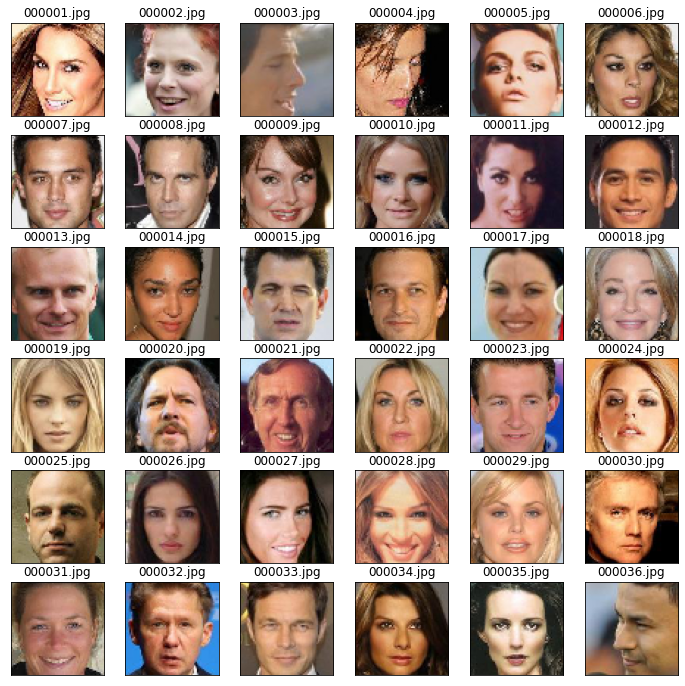

In [16]:
size = 6
fig = plt.figure(figsize=(size*2,size*2))
for i in range(size*size):
    plt.subplot(size,size,i+1)
    plt.imshow(x_data[i].reshape(x_data.shape[1:]))
    plt.xticks([])
    plt.yticks([])
    plt.title(y_data[i][0])
    #plt.subplot(size,size,i+1)
    #plt.imshow(x_data[i].reshape(x_data.shape[1:]))
plt.show()
plt.close('all')

In [ ]:
=